<a href="https://colab.research.google.com/github/onolab-tmu/audio-processing-100-knocks/blob/master/lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# パイソンのNumpyで線形台数

## 先週のリマインド

In [0]:
import numpy as np  # アレー演算と線形台数
import matplotlib.pyplot as plt  # 図
from scipy.io import wavfile  # オーディオファイルの読み込み
from IPython.display import Audio  # ノートブックでのオーディオ再生

## Numpyでアレー演算

`numpy`はアレー演算と線形代数のパッケージ



１次元アレーか**ベクトル**

In [29]:
a_1d = np.array([1, 0.5, -2])
print(a_1d)
print("The shape of this array is", a_1d.shape)

[ 1.   0.5 -2. ]
The shape of this array is (3,)


0から、`N-1`までの整数

In [32]:
N = 10
a = np.arange(N+1)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10]


１から、`N-1`まで、2つずつ

In [35]:
b = np.arange(2, N, 3)
print(b)

[2 5 8]


`N`から、１まで

In [17]:
c = np.arange(N, 0, -1)
print(c)

[10  9  8  7  6  5  4  3  2  1]


行列・２次元アレーも作れます

In [18]:
a_2d = np.array(
    [[1, 2, 3],
     [4, 5, 6]]
)
print(a_2d)
print("The size of this array is", a_2d.shape)

[[1 2 3]
 [4 5 6]]
The size of this array is (2, 3)


示したサイズの`0`入りのアレーも作れます

In [19]:
my_empty_array = np.zeros(10)
print(my_empty_array)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


２次元も出来ます

In [20]:
# shape は`(4, 3)`, 括弧は大事です！
my_empty_array_2d = np.zeros((4, 3))
print(my_empty_array_2d)
print("The shape of this array is", my_empty_array_2d.shape)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
The shape of this array is (4, 3)


同じく、`1`だけのアレーも作れます

In [25]:
my_one_array = np.ones(10)
print("A 1D array of 1s with shape:", my_one_array.shape)
print(my_one_array)

my_one_array_2d = np.ones((2, 4))
print("A 2D array of 1s with shape:", my_one_array_2d.shape)
print(my_one_array_2d)

A 1D array of 1s with shape: (10,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
A 2D array of 1s with shape: (2, 4)
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


## Numpyで線形台数やりましょう！

### 第１問

次の連立方程式をNumpyでときましょう。

$$
  \left\{
    \begin{array}{rcl}
    3 x_1 - 2 x_2 & = & 5 \\
    -7x_1 + 3 x_2 & = & -10
   \end{array}
  \right.
$$

連立方程式は行列の形でかけます
$$
\mathbf{A} \mathbf{x} = \mathbf{b}
$$
なので、最初はNumpyのアレーで行列$\mathbf{A}$とベクトル$\mathbf{b}$を書きます。

出来たら、`x = np.linalg.solve(A, b)`でとく事が出来ます。


In [40]:
A = np.array(
    [[3, -2],
     [-7, 3]]
)
b = np.array([5, -10])
x = np.linalg.solve(A, b)
print(x)

[ 1. -1.]


次は、行列積で、答えを確かめましょう。行列積は`@`オペレーターか、`np.dot`を使えます。

In [41]:
b_2 = A @ x  # または, b_2 = np.dot(A, x)
print(b)
print(b_2)

[  5 -10]
[  5. -10.]


### 第２問 線形回帰

$$
y_i = a x_i + b + w_i, \quad i=1,\ldots,N
$$

* $a,b$はコンスタントパラメーター
* $w_i$はノイズです

$a,b$をデータから求めましょう

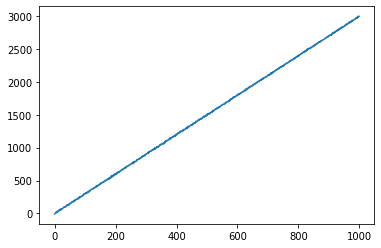

In [71]:
a = 3.
b = -1
N = 1000

x = np.arange(N)

y = a * x + b + 5 * np.random.randn(N)

plt.plot(x, y)

In [72]:
x_sum_sq = np.sum(x ** 2)
x_sum = np.sum(x)
xy_sum = np.sum(x * y)
y_sum = np.sum(y)

A = np.array([[x_sum_sq, x_sum], [x_sum, N]])
b = np.array([xy_sum, y_sum])
p = np.linalg.solve(A, b)
print(p)

y_2 = p[0] * x + p[1]

[ 3.00010405 -1.16907778]


In [69]:
A = np.c_[x, np.ones(x.shape)]
p = np.linalg.solve(A.T @ A, A.T @ y)
print(p)

[ 2.5984993  -1.37612806]


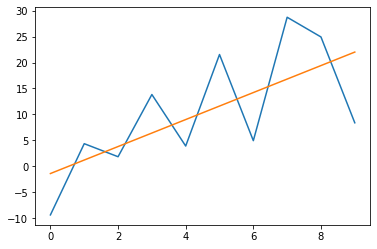

In [70]:
plt.plot(x, y)
plt.plot(x, y_2)